In [244]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pathlib import Path
# ignore warnings
import warnings
warnings.filterwarnings('ignore')
data_folder=Path("C:/Users/msi/Desktop/clustering/")
file_to_open= data_folder/ "FaceBook-dataset.csv"

In [245]:
%%time
df = pd.read_csv(file_to_open)

Wall time: 27.9 ms


In [246]:
df.shape

(7050, 16)

In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
status_id           7050 non-null object
status_type         7050 non-null object
status_published    7050 non-null object
num_reactions       7050 non-null int64
num_comments        7050 non-null int64
num_shares          7050 non-null int64
num_likes           7050 non-null int64
num_loves           7050 non-null int64
num_wows            7050 non-null int64
num_hahas           7050 non-null int64
num_sads            7050 non-null int64
num_angrys          7050 non-null int64
Column1             0 non-null float64
Column2             0 non-null float64
Column3             0 non-null float64
Column4             0 non-null float64
dtypes: float64(4), int64(9), object(3)
memory usage: 881.4+ KB


In [248]:
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [249]:
df.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
status_id           7050 non-null object
status_type         7050 non-null object
status_published    7050 non-null object
num_reactions       7050 non-null int64
num_comments        7050 non-null int64
num_shares          7050 non-null int64
num_likes           7050 non-null int64
num_loves           7050 non-null int64
num_wows            7050 non-null int64
num_hahas           7050 non-null int64
num_sads            7050 non-null int64
num_angrys          7050 non-null int64
dtypes: int64(9), object(3)
memory usage: 661.1+ KB


In [250]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [251]:
# let's check status id properties
df['status_id'].unique()

array(['246675545449582_1649696485147474',
       '246675545449582_1649426988507757',
       '246675545449582_1648730588577397', ...,
       '1050855161656896_1060126464063099',
       '1050855161656896_1058663487542730',
       '1050855161656896_1050858841656528'], dtype=object)

In [252]:
# It's clearly observable that each row has a unique ID; After all the name of that columns is ID and it makes sense
# view how many different types there are
len(df['status_id'].unique())

6997

In [253]:
# let's check status type properties
df['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [254]:
# let's check status published properties
df['status_published'].unique()

array(['4/22/2018 6:00', '4/21/2018 22:45', '4/21/2018 6:17', ...,
       '9/21/2016 23:03', '9/20/2016 0:43', '9/10/2016 10:30'],
      dtype=object)

In [255]:
len(df['status_published'].unique())

6913

In [256]:
df.drop(['status_id'], axis=1, inplace=True)

[Text(0, 0.5, 'Quantity'), Text(0.5, 0, 'Status_Type')]

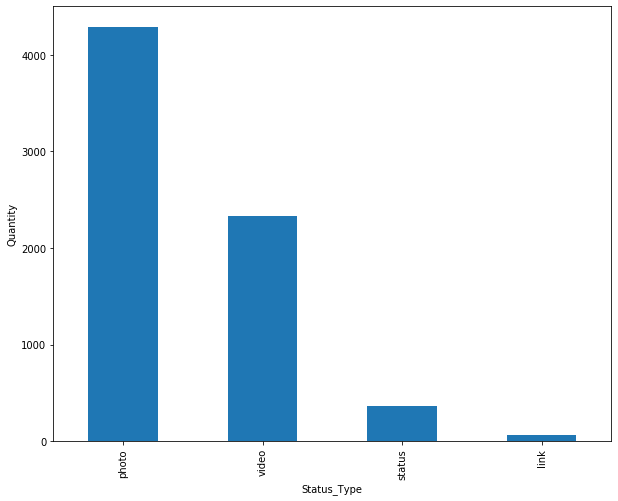

In [257]:
df.status_type.value_counts().plot(kind='bar', figsize=(10,8)).set(xlabel="Status_Type", ylabel="Quantity")

In [258]:
## Test to see if number of reactions is equal to sum of happy,sad,wow and etc.
df['total_reaction'] = df.iloc[:,5:].sum(axis=1)

In [259]:
df['test'] = df.apply(lambda x: x['num_reactions'] == x['total_reaction'],axis=1)
is_same=df[df.test==True]
is_same.shape

(7041, 13)

In [260]:
## convert status_published form String to Datetime
df['status_published'] = pd.to_datetime(df['status_published'])
df['published_year']=df['status_published'].dt.year

In [261]:
df['video'] =df['status_type'].map(lambda x:1 if(x=='video') else 0)
df['photo']=df['status_type'].map(lambda x:1 if(x=='photo') else 0)
df['status']=df['status_type'].map(lambda x:1 if(x=='status') else 0)
df['link']=df['status_type'].map(lambda x:1 if(x=='link') else 0)

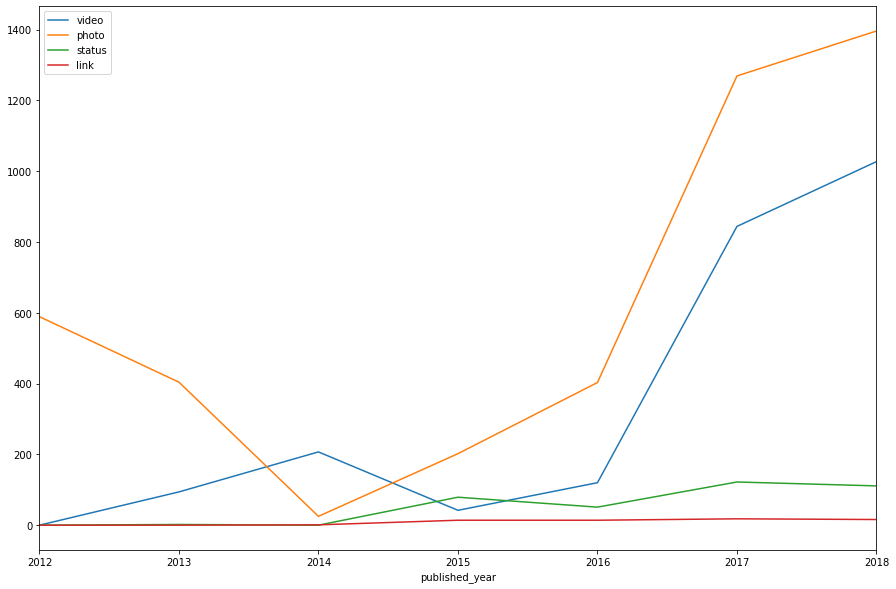

In [262]:
total_type=['video','photo','status','link']
df.groupby('published_year').sum()[total_type].plot(figsize=(15,10))

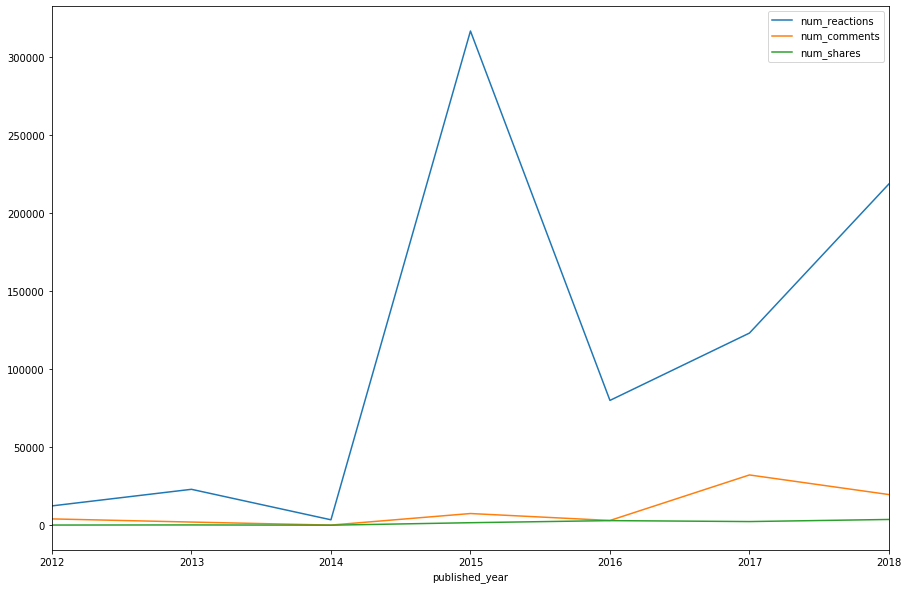

In [263]:
df[df['photo']==1].groupby('published_year').sum()[['num_reactions','num_comments','num_shares']].plot(figsize=(15,10))

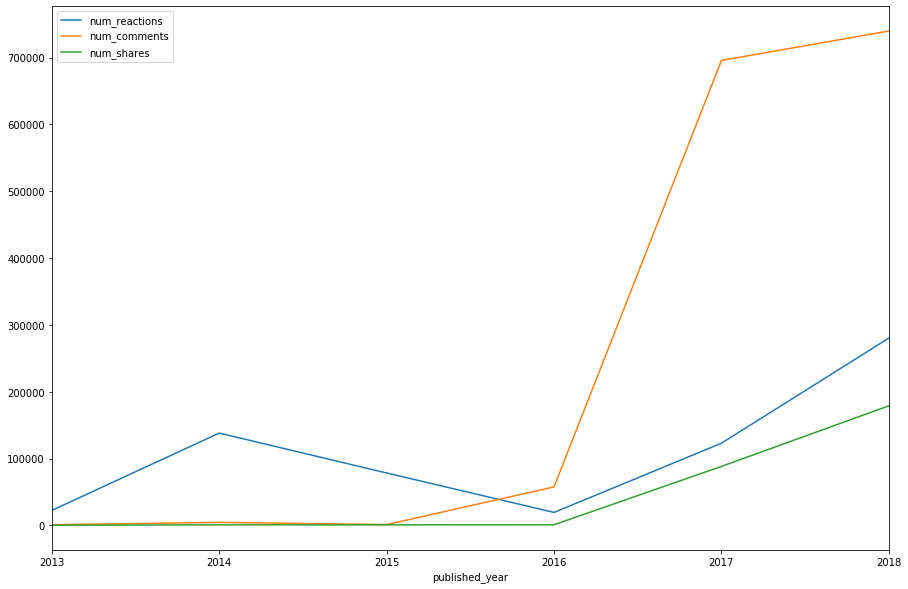

In [264]:
df[df['video']==1].groupby('published_year').sum()[['num_reactions','num_comments','num_shares']].plot(figsize=(15,10))

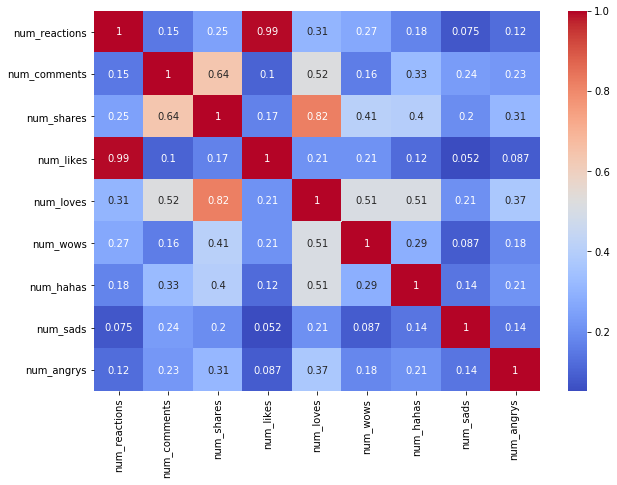

In [265]:
plt.rcParams['figure.figsize'] = [10,7]
sns.heatmap(df[['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas','num_sads', 'num_angrys']].corr(), cmap='coolwarm', annot=True)
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!